# Predictions Loans

Author: Necky Tran <br>
Date: 31/01/24

### Table of Contents

1. [Introduction](#Introduction)
2. [Wrangling](#Wrangling)
3. [Statistical Analysis](#Statistical_Analysis)
4. [Linear Regression](#Linear)
5. [Summary](#Summary)

# Introduction
This notebook contains a Loan Classification Dataset. The dataset is sourced from Kaggle:
- 'https://www.kaggle.com/datasets/abhishek14398/loan-dataset/data'
-  the purpose is to quickly train classification models and compare 



In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
# load data
loan_df = pd.read_csv('loan_data.csv')
# view first rows
loan_df.head()

C:\Users\trann\AppData\Local\Temp\ipykernel_10512\1077288624.py:2: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  loan_df = pd.read_csv('loan_data.csv')


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [23]:
# Check Shape, Info(Number of Rows and Columns) and datatype of loan data

print("Shape of the data frame :",loan_df.shape)
print("===================================================")
print(loan_df.info())

Shape of the data frame : (39717, 111)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB
None


Rows: 39717 <br>
Columns : 111

From the first look into the data, it looks like some columns are filled with NaN values. Locate them and remove

In [24]:
# Create a boolean mask of NaN values, True = NaN
nan_mask = loan_df.isna()

# Check if all values in each column are True (i.e., all NaN)
columns_with_only_nan = nan_mask.all()

# Extract column names with only NaN values
empty = columns_with_only_nan[columns_with_only_nan].index

print("Columns with only NaN values:", list(empty))

print("# of Columns with only NaN values:", len(empty))

Columns with only NaN values: ['mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_

In [25]:
# drop empty columns
loan_df = loan_df.drop(columns = empty)

In [26]:
# check new shape
loan_df.shape

(39717, 57)

In [27]:
# sum missing data and sort
loan_df.isna().sum().sort_values(ascending=False)

next_pymnt_d                  38577
mths_since_last_record        36931
mths_since_last_delinq        25682
desc                          12940
emp_title                      2459
emp_length                     1075
pub_rec_bankruptcies            697
last_pymnt_d                     71
chargeoff_within_12_mths         56
collections_12_mths_ex_med       56
revol_util                       50
tax_liens                        39
title                            11
last_credit_pull_d                2
home_ownership                    0
int_rate                          0
out_prncp_inv                     0
total_pymnt                       0
total_pymnt_inv                   0
total_rec_prncp                   0
total_rec_int                     0
total_rec_late_fee                0
recoveries                        0
collection_recovery_fee           0
term                              0
last_pymnt_amnt                   0
initial_list_status               0
funded_amnt_inv             

Drop columns with null values

In [28]:
# Find columns with missing data
columns_with_missing_data = loan_df.columns[loan_df.isna().any()].tolist()

# Drop columns with missing data from the original DataFrame
loan_df = loan_df.drop(columns=columns_with_missing_data)

In [29]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 43 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       39717 non-null  int64  
 1   member_id                39717 non-null  int64  
 2   loan_amnt                39717 non-null  int64  
 3   funded_amnt              39717 non-null  int64  
 4   funded_amnt_inv          39717 non-null  float64
 5   term                     39717 non-null  object 
 6   int_rate                 39717 non-null  object 
 7   installment              39717 non-null  float64
 8   grade                    39717 non-null  object 
 9   sub_grade                39717 non-null  object 
 10  home_ownership           39717 non-null  object 
 11  annual_inc               39717 non-null  float64
 12  verification_status      39717 non-null  object 
 13  issue_d                  39717 non-null  object 
 14  loan_status           

Loan Status is our target variable
- it predicts if a person has fully paid off their loan or defaulted ('charged off')

In [30]:
# check distribution of loan status
loan_df['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

Remove Rows that are current customers, and remove other features that we do not think will be imporant (ex. policy_code)

In [31]:
loan_df = loan_df[loan_df.loan_status != "Current"]

In [32]:
loan_df['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Name: loan_status, dtype: int64

In [33]:
loan_df['loan_status'].value_counts()*100/len(loan_df)

Fully Paid     85.413588
Charged Off    14.586412
Name: loan_status, dtype: float64

Find Columns to remove that will not help with predictions: <br>
id, member_id, url, zip_code, addr_state, issue_d, initial_list_status, policy_code, acc_now_delinq, delinq_amnt, out_prncp, out_prncp_inv

In [34]:
columns_to_drop = ['id', 'member_id', 'url', 'zip_code', 'addr_state', 'issue_d', 'initial_list_status', 'policy_code', 'acc_now_delinq', 'delinq_amnt', 'out_prncp', 'out_prncp_inv']

In [35]:
loan_df = loan_df.drop(columns=columns_to_drop)

In [36]:
loan_df.shape

(38577, 31)

Now remove columns that are multi-collinear

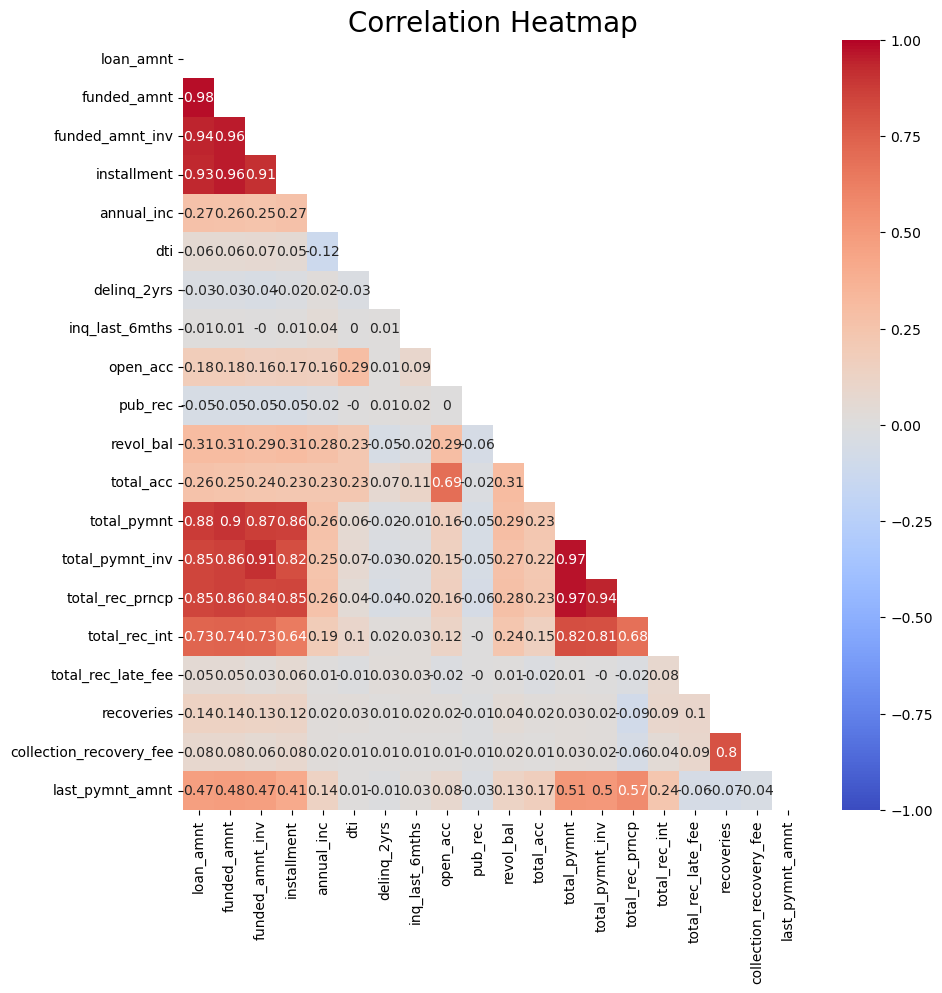

In [37]:
plt.figure(figsize=(10,10))
sns.heatmap(loan_df.corr().round(2), annot = True, cmap = 'coolwarm', vmin = -1, vmax = 1, mask = np.triu(loan_df.corr()) )
plt.title('Correlation Heatmap', size = 20)
plt.show()

Remove multicollinear variables
- funded_amnt, funded_amnt_inv, installment, total_pymnt, total_pyment_inv, total_rec_prncp, total_rec_int

In [38]:
loan_df.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'home_ownership', 'annual_inc',
       'verification_status', 'loan_status', 'pymnt_plan', 'purpose', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'total_acc', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt', 'application_type'],
      dtype='object')

In [39]:
columns_to_drop = ['funded_amnt', 'funded_amnt_inv', 'installment', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'collection_recovery_fee']
loan_df = loan_df.drop(columns=columns_to_drop)

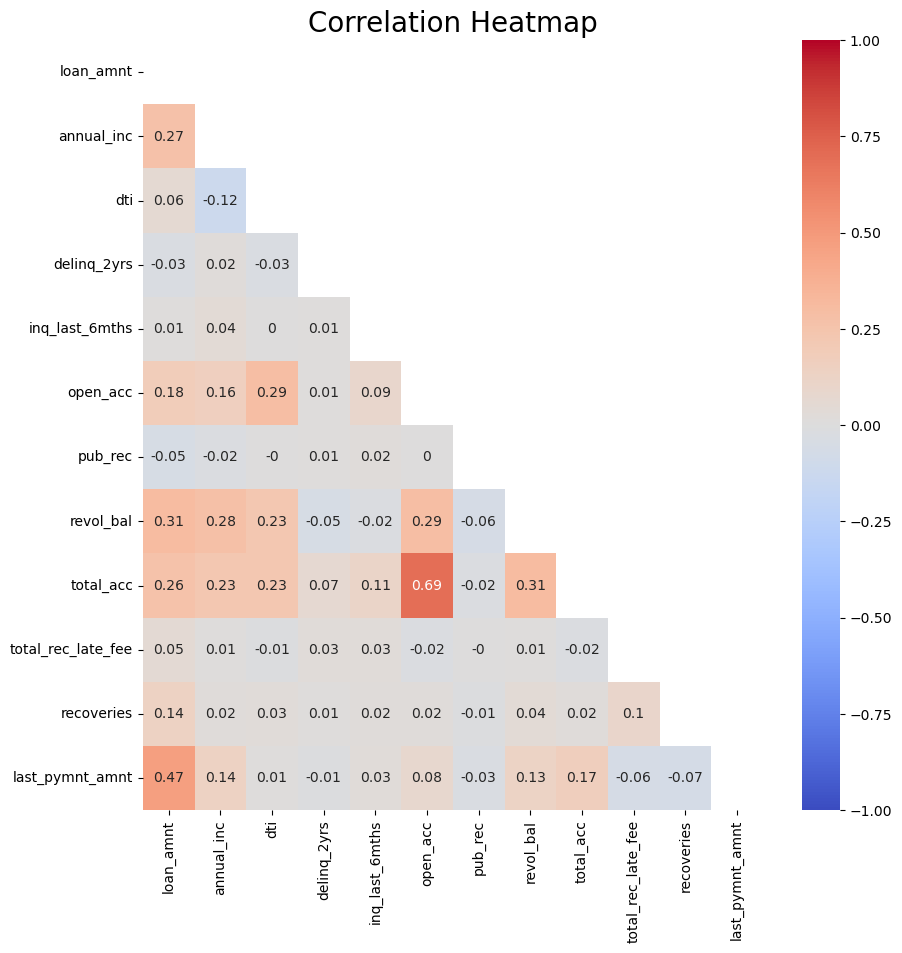

In [40]:
plt.figure(figsize=(10,10))
sns.heatmap(loan_df.corr().round(2), annot = True, cmap = 'coolwarm', vmin = -1, vmax = 1, mask = np.triu(loan_df.corr()) )
plt.title('Correlation Heatmap', size = 20)
plt.show()

In [41]:
loan_df.columns

Index(['loan_amnt', 'term', 'int_rate', 'grade', 'sub_grade', 'home_ownership',
       'annual_inc', 'verification_status', 'loan_status', 'pymnt_plan',
       'purpose', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'open_acc', 'pub_rec', 'revol_bal', 'total_acc', 'total_rec_late_fee',
       'recoveries', 'last_pymnt_amnt', 'application_type'],
      dtype='object')

In [42]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            38577 non-null  int64  
 1   term                 38577 non-null  object 
 2   int_rate             38577 non-null  object 
 3   grade                38577 non-null  object 
 4   sub_grade            38577 non-null  object 
 5   home_ownership       38577 non-null  object 
 6   annual_inc           38577 non-null  float64
 7   verification_status  38577 non-null  object 
 8   loan_status          38577 non-null  object 
 9   pymnt_plan           38577 non-null  object 
 10  purpose              38577 non-null  object 
 11  dti                  38577 non-null  float64
 12  delinq_2yrs          38577 non-null  int64  
 13  earliest_cr_line     38577 non-null  object 
 14  inq_last_6mths       38577 non-null  int64  
 15  open_acc             38577 non-null 

In [43]:
loan_df.head()

,loan_amnt,term,int_rate,grade,sub_grade,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,...,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,total_rec_late_fee,recoveries,last_pymnt_amnt,application_type
0,5000,36 months,10.65%,B,B2,RENT,24000.0,Verified,Fully Paid,n,...,Jan-85,1,3,0,13648,9,0.00,0.00,171.62,INDIVIDUAL
1,2500,60 months,15.27%,C,C4,RENT,30000.0,Source Verified,Charged Off,n,...,Apr-99,5,3,0,1687,4,0.00,117.08,119.66,INDIVIDUAL
2,2400,36 months,15.96%,C,C5,RENT,12252.0,Not Verified,Fully Paid,n,...,Nov-01,2,2,0,2956,10,0.00,0.00,649.91,INDIVIDUAL
3,10000,36 months,13.49%,C,C1,RENT,49200.0,Source Verified,Fully Paid,n,...,Feb-96,1,10,0,5598,37,16.97,0.00,357.48,INDIVIDUAL
5,5000,36 months,7.90%,A,A4,RENT,36000.0,Source Verified,Fully Paid,n,...,Nov-04,3,9,0,7963,12,0.00,0.00,161.03,INDIVIDUAL


In [46]:
loan_df['pymnt_plan'].value_counts()

n    38577
Name: pymnt_plan, dtype: int64

In [47]:
loan_df['earliest_cr_line'].value_counts()

Oct-99    360
Nov-98    357
Oct-00    341
Dec-98    340
Dec-97    318
         ... 
Nov-65      1
Feb-73      1
Oct-08      1
Dec-61      1
Oct-74      1
Name: earliest_cr_line, Length: 524, dtype: int64

In [48]:
loan_df['term'].value_counts()

 36 months    29096
 60 months     9481
Name: term, dtype: int64

In [49]:
loan_df['application_type'].value_counts()

INDIVIDUAL    38577
Name: application_type, dtype: int64

In [50]:
loan_df['purpose'].value_counts()

debt_consolidation    18055
credit_card            5027
other                  3865
home_improvement       2875
major_purchase         2150
small_business         1754
car                    1499
wedding                 926
medical                 681
moving                  576
vacation                375
house                   367
educational             325
renewable_energy        102
Name: purpose, dtype: int64

In [51]:
columns_to_drop = ['pymnt_plan', 'application_type', 'earliest_cr_line']
loan_df = loan_df.drop(columns=columns_to_drop)

In [59]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            38577 non-null  int64  
 1   term                 38577 non-null  object 
 2   int_rate             38577 non-null  object 
 3   grade                38577 non-null  object 
 4   sub_grade            38577 non-null  object 
 5   home_ownership       38577 non-null  object 
 6   annual_inc           38577 non-null  float64
 7   verification_status  38577 non-null  object 
 8   loan_status          38577 non-null  object 
 9   purpose              38577 non-null  object 
 10  dti                  38577 non-null  float64
 11  delinq_2yrs          38577 non-null  int64  
 12  inq_last_6mths       38577 non-null  int64  
 13  open_acc             38577 non-null  int64  
 14  pub_rec              38577 non-null  int64  
 15  revol_bal            38577 non-null 

In [52]:
# Get a list of all categorical columns
categorical_columns = loan_df.select_dtypes(include=['object']).columns

# Perform one-hot encoding
df_encoded = pd.get_dummies(loan_df, columns=categorical_columns, drop_first=True)

# Display the encoded DataFrame
print(df_encoded)

       loan_amnt  annual_inc    dti  delinq_2yrs  inq_last_6mths  open_acc  \
0           5000     24000.0  27.65            0               1         3   
1           2500     30000.0   1.00            0               5         3   
2           2400     12252.0   8.72            0               2         2   
3          10000     49200.0  20.00            0               1        10   
5           5000     36000.0  11.20            0               3         9   
...          ...         ...    ...          ...             ...       ...   
39712       2500    110000.0  11.33            0               0        13   
39713       8500     18000.0   6.40            1               1         6   
39714       5000    100000.0   2.30            0               0        11   
39715       5000    200000.0   3.72            0               0        17   
39716       7500     22000.0  14.29            1               0         7   

       pub_rec  revol_bal  total_acc  total_rec_late_fee  ...  

In [54]:
df_encoded.head()

,loan_amnt,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,total_rec_late_fee,...,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
0,5000,24000.0,27.65,0,1,3,0,13648,9,0.00,...,0,0,0,0,0,0,0,0,0,0
1,2500,30000.0,1.00,0,5,3,0,1687,4,0.00,...,0,0,0,0,0,0,0,0,0,0
2,2400,12252.0,8.72,0,2,2,0,2956,10,0.00,...,0,0,0,0,0,0,0,1,0,0
3,10000,49200.0,20.00,0,1,10,0,5598,37,16.97,...,0,0,0,0,0,1,0,0,0,0
5,5000,36000.0,11.20,0,3,9,0,7963,12,0.00,...,0,0,0,0,0,0,0,0,0,1


In [58]:
df_encoded.shape

(38577, 442)